In [1]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


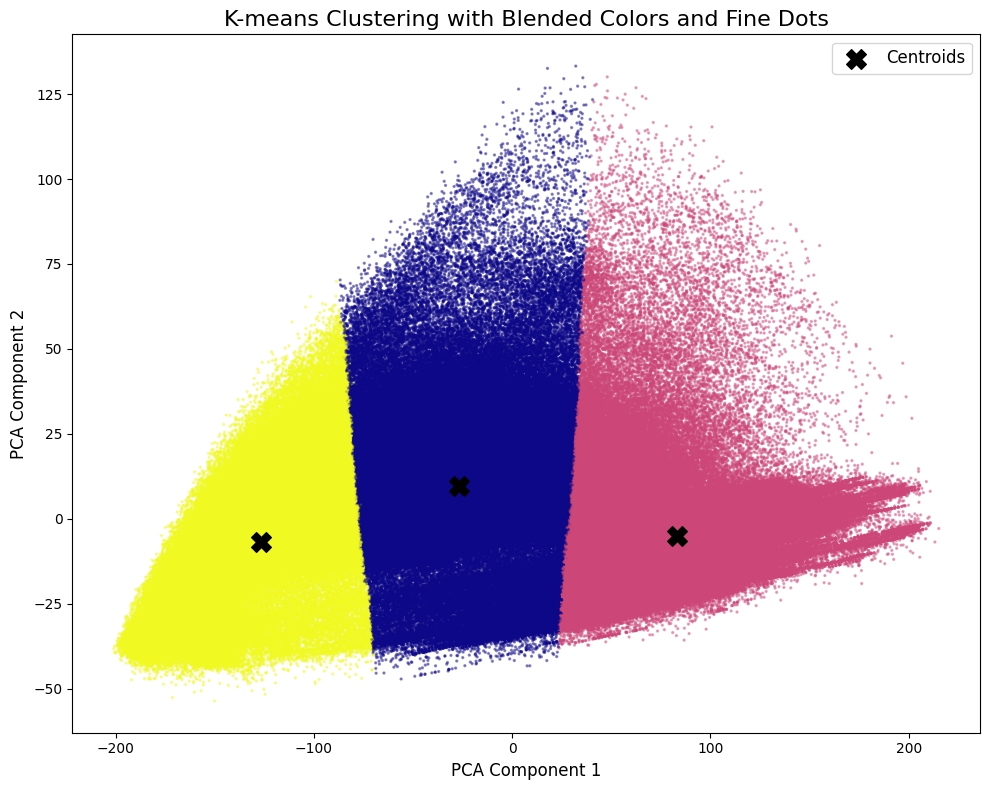

In [4]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Function to process selected folders for K-means clustering
def process_selected_folders(source_directory, folders, n_clusters=3, sample_size=100):
    all_pixels = []

    for folder in folders:
        folder_path = os.path.join(source_directory, folder)
        if os.path.isdir(folder_path):
            images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            sampled_images = random.sample(images, min(sample_size, len(images)))

            for image_name in sampled_images:
                image_path = os.path.join(folder_path, image_name)
                try:
                    image = Image.open(image_path).convert("RGB")
                    image = image.resize((64, 64))  # Resize to a smaller size
                    image_np = np.array(image)
                    pixels = image_np.reshape(-1, 3)
                    all_pixels.extend(pixels.tolist())
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")

    all_pixels = np.array(all_pixels)

    if len(all_pixels) == 0:
        print("No pixels collected. Check if images are available.")
        return None, None

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(all_pixels)

    return kmeans.cluster_centers_, kmeans.labels_, all_pixels

# Function to visualize clusters with smooth blending and smaller dots
def visualize_clusters(centroids, nearest_centroids, all_pixels):
    pca = PCA(n_components=2)  # Reduce dimensionality to 2D for visualization
    pixels_2d = pca.fit_transform(all_pixels)
    centroids_2d = pca.transform(centroids)

    plt.figure(figsize=(10, 8))

    # Scatter plot for pixels with finer dots and smooth color blending
    plt.scatter(pixels_2d[:, 0], pixels_2d[:, 1], c=nearest_centroids, cmap='plasma', s=2, alpha=0.4)

    # Plot centroids with larger markers and a dark color
    plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], color='black', marker='X', s=200, label='Centroids')

    # Set title and labels
    plt.title("K-means Clustering with Blended Colors and Fine Dots", fontsize=16)
    plt.xlabel("PCA Component 1", fontsize=12)
    plt.ylabel("PCA Component 2", fontsize=12)

    # Add a legend
    plt.legend(loc='upper right', fontsize=12)

    # Use a tight layout and display the plot
    plt.tight_layout()
    plt.show()

# Directory path
source_directory = '/content/drive/My Drive/Machine learning/Plant disease/PlantVillage/'
selected_folders = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

# Process images and perform K-means clustering
n_clusters = 3  # Number of clusters you want to visualize
centroids, nearest_centroids, all_pixels = process_selected_folders(source_directory, selected_folders, n_clusters)

if centroids is not None:
    visualize_clusters(centroids, nearest_centroids, all_pixels)
